In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
from astropy.io import ascii
from matplotlib import pyplot as plt

In [2]:
# Read in the catalogue of potential YSOs
file = '/Disk/ds-sopa-ifa-ug/s1625982/fred/NGC6822_filtered.csv'
data = ascii.read(file, data_start=1)

# Print the number of potential YSOs found in the table
source_num=len(data)
print("The number of YSO candidates in the table is",source_num)

idx_both = np.where(data['good_both?']==1)
both_num=len(idx_both[0])
print("The number of sources flagging as good SPs and YSOs simultaneously is",both_num,"(",both_num*100/source_num,"%)")

idx_good_YSO = np.where(data['good_YSO?']==1)
good_YSO_num=len(idx_good_YSO[0])
print("The number of sources flagging as good YSOs is",good_YSO_num,"(",good_YSO_num*100/source_num,"%)")

idx_good_SP = np.where(data['good_SP?']==1)
good_SP_num=len(idx_good_SP[0])
print("The number of sources flagging as good SPs is",good_SP_num,"(",good_SP_num*100/source_num,"%)")

The number of YSO candidates in the table is 518
The number of sources flagging as good SPs and YSOs simultaneously is 98 ( 18.91891891891892 %)
The number of sources flagging as good YSOs is 223 ( 43.05019305019305 %)
The number of sources flagging as good SPs is 245 ( 47.2972972972973 %)


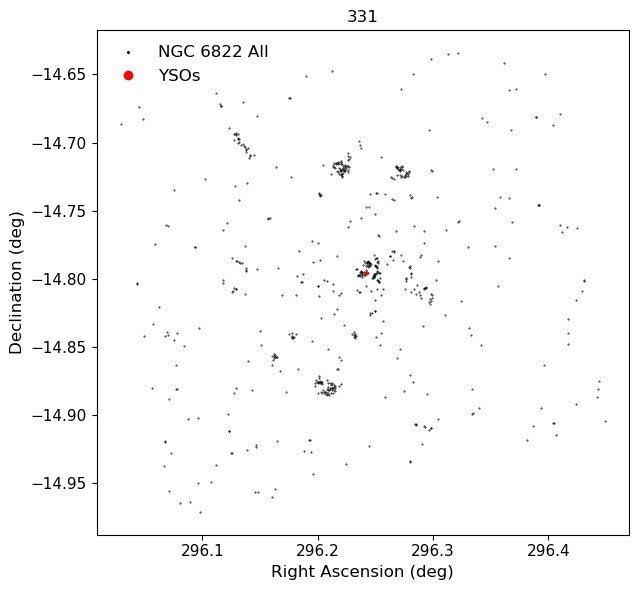

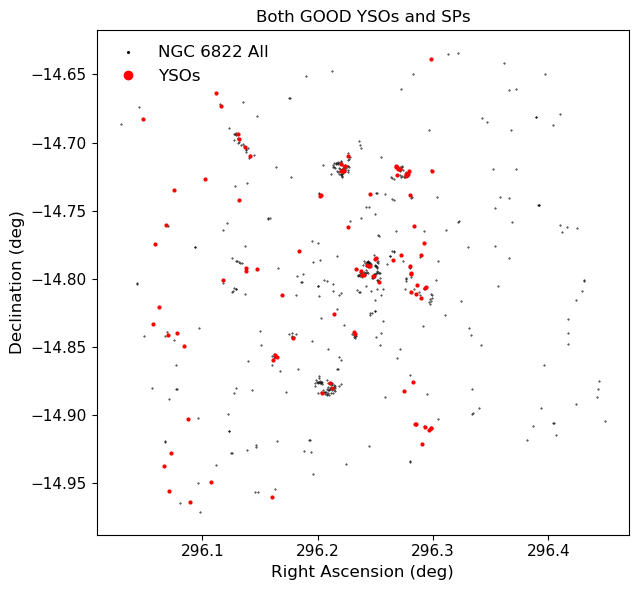

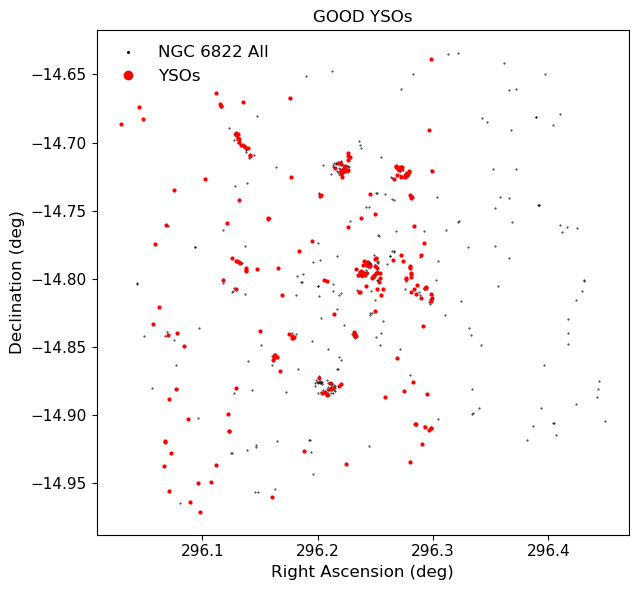

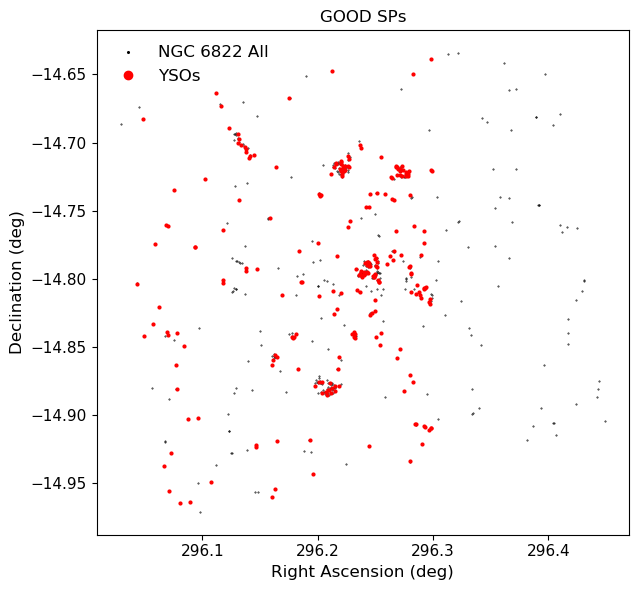

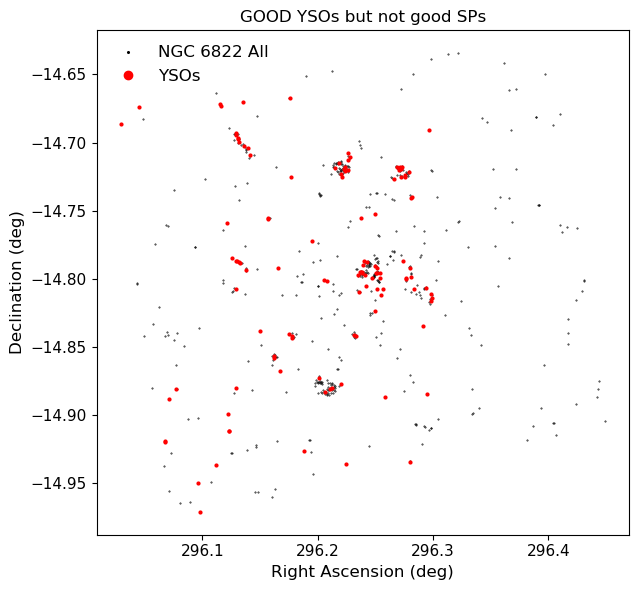

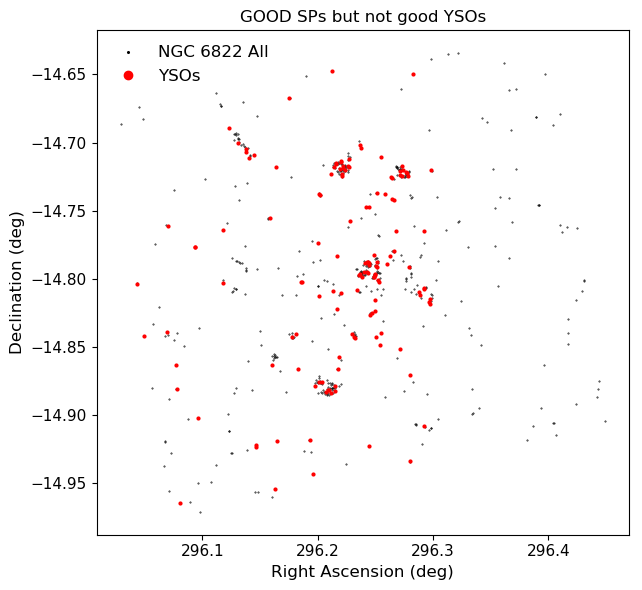

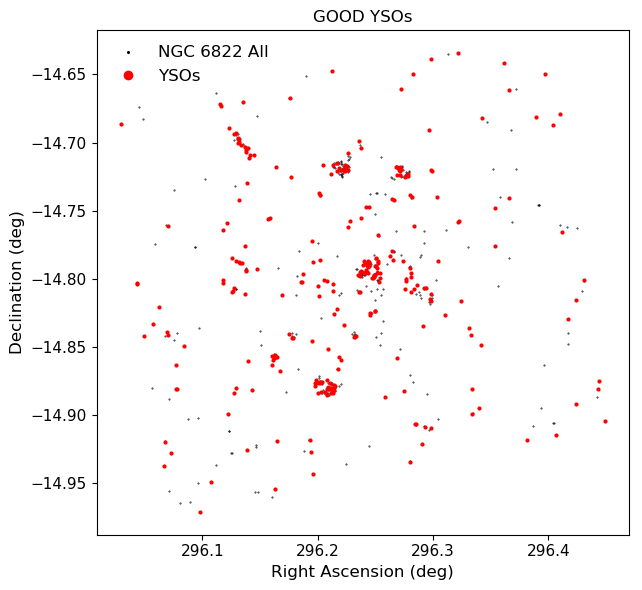

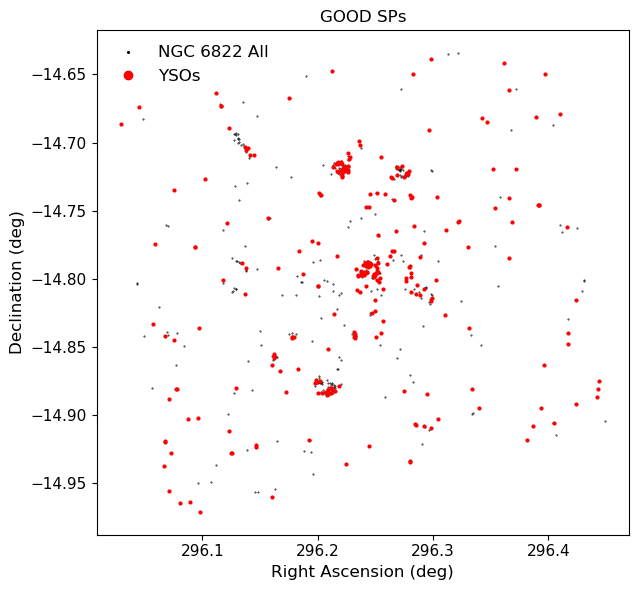

In [3]:
# Read in YSO table to plot as background
table_file = '/Disk/ds-sopa-ifa-ug/s1625982/fred/NGC6822_YSOs.csv'
table = ascii.read(table_file, data_start=1)

# Find reliably-scored sources and index their positions
reliable_idx=((table['SpNum']>=3)|((table['HJKNum']>=2) & (table['45 data?']==1) & (table['36 data?']==1)))
reliable_cat=table[reliable_idx]
idx_rel_score=np.where(reliable_cat['YSO Score']>=3)

# Function to overplot a set of candidates onto the galaxy
def location_plot(sp_idx,plot_idx,title):
    # Plot the cataloge data on the sky
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)
    plt.rc("axes", labelsize=11)
    plt.rc("legend", fontsize=12)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    
    # Setting up figure
    plt.figure(figsize=(12,6))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='black', ms=0.8, label="NGC 6822 All")
    
    #overplot all reliable sources that meet the cut
    plt.plot(reliable_cat['RA'][plot_idx], reliable_cat['Dec'][plot_idx], '.', color='red', ms=4, label="YSOs")
    
    plt.xlabel('Right Ascension (deg)', size=12)
    plt.ylabel('Declination (deg)', size=12)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(title)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()

    
location_plot(idx_rel_score,np.array([331]),'331')

location_plot(idx_rel_score,idx_both,'Both GOOD YSOs and SPs')
location_plot(idx_rel_score,idx_good_YSO,'GOOD YSOs')
location_plot(idx_rel_score,idx_good_SP,'GOOD SPs')

idx_YSO_no_SP = np.where((data['good_YSO?']==1) & (data['good_SP?']==0))
location_plot(idx_rel_score,idx_YSO_no_SP,'GOOD YSOs but not good SPs')
idx_SP_no_YSO = np.where((data['good_YSO?']==0) & (data['good_SP?']==1))
location_plot(idx_rel_score,idx_SP_no_YSO,'GOOD SPs but not good YSOs')

good_YSO_path = '/Disk/ds-sopa-ifa-ug/s1625982/fred/ZIP/Good_YSOs/'
onlyfiles = [f for f in listdir(good_YSO_path) if isfile(join(good_YSO_path, f))]
current_array = np.array([0])
for i in range(len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    new_array = np.array(num_file)
    current_array = np.append(current_array,new_array)
    

location_plot(idx_rel_score,current_array,'GOOD YSOs')

good_SP_path = '/Disk/ds-sopa-ifa-ug/s1625982/fred/ZIP/sp_good/'
onlyfiles = [f for f in listdir(good_SP_path) if isfile(join(good_SP_path, f))]
current_array = np.array([0])
for i in range(len(onlyfiles)):
    filename = onlyfiles[i]
    num_file = int(filename[0:len(filename)-4])
    new_array = np.array(num_file)
    current_array = np.append(current_array,new_array)


location_plot(idx_rel_score,current_array,'GOOD SPs')